# EDA on Best Selling Books
<img src="https://github.com/NiveditaAb/EDA_Project/blob/master/books.jpg?raw=true"  width=550 height=450 align='left'>
<img src="https://github.com/NiveditaAb/EDA_Project/blob/master/book_bestSeller.jpg?raw=true" width=250 height=100>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

A popular bookshop has decided to dive into digitalization age with an online portal.<br>
They also want to give their clients **pointers and insight on writing a best selling book**.<br>
They have months of data of books of different genre, the listings of the books over weeks and they want to know **the recipe for a best selling book, to share with their clients**.

<a id=section2></a>
## 2. Importing Packages

In [42]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [44]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in b:\softwares\anaconda3\lib\site-packages (4.7.1)


In [45]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
#import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

<img src="https://github.com/NiveditaAb/EDA_Project/blob/master/Batch.jpg?raw=true" width=350 height=350><br/>

In this **Data Visualization** sheet we are using three datasets for different genres of books. 

- 1. **My Sales** dataset: This dataset contains information about the sales of books in the bookshop.

- 2. **2018 Bestsellers** dataset: This dataset contains information on best selling books in 2018.

- 3. **Books into Movies** dataset: This dataset tells us about the books that have been adapted into movies.

The datasets have been taken from Tableau training materials.

### Importing 1st Dataset

In [46]:
# Importing the 1st dataset (My Sales).

df_sales = pd.read_excel('https://github.com/NiveditaAb/EDA_Project/blob/master/book_data_for_tableau_prep/MY%20SALES.xlsx?raw=true')
df_sales.head()

,Transaction ID,Date,Title,Author,ISBN,Price,Discount,Sale Price
0,0218-1,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99
1,0218-2,2018-02-01,The Book of Dust: La Belle Sauvage,Philip Pullman,9780375815300,22.99,0.0,22.99
2,0218-3,2018-02-01,The Book Thief,Markus Zusak,9780385754729,12.99,0.0,12.99
3,0218-4,2018-02-01,The Hazel Wood,Melissa Albert,9781250147905,16.99,0.0,16.99
4,0218-5,2018-02-01,The Cruel Prince,Holly Black,9780316310277,18.99,0.0,18.99


<a id=section301></a>
### 3.1 Description of the Dataset - 1

- This dataset provides a sales data of the bookshop, for February, 2018.
- Transaction ID describes the transaction code associated with the sale.
- Date descibes the date of sale.
- Title describes the name of the book.
- Author describes the name of the author.
- ISBN descibes the standard number of the book.
- Price describes the cost of the book.
- Discount describes the amount of discount applied at the time of sale of the book.
- Sale Price describes the final sale price of the book with discount applied.

In [47]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  603 non-null    object        
 1   Date            603 non-null    datetime64[ns]
 2   Title           603 non-null    object        
 3   Author          603 non-null    object        
 4   ISBN            603 non-null    int64         
 5   Price           603 non-null    float64       
 6   Discount        603 non-null    float64       
 7   Sale Price      603 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 37.8+ KB


  - There are a total of **603 samples (rows)** and **8 columns** in the dataframe.
  
  - There are **4 columns** with a **numeric** datatype, **3 columns** with an **object** datatype and **1 column** with a **datetime** datatype.
  
  - There are **0 missing** values in the data.

### Importing 2nd Dataset

In [48]:
# Importing the 2nd dataset (Best Sellers Information dataset).

df_bestSeller = pd.read_csv('https://github.com/NiveditaAb/EDA_Project/blob/master/book_data_for_tableau_prep/2018%20Bestsellers.csv?raw=true')
df_bestSeller.head()

,Title,Week,List,Rank,Author,Price,ISBN,Previous Rank,Weeks on List
0,A Wrinkle in Time,2/14/2018,Early & Middle,1,Madeleine L'Engle,8.99,9781250153272,NaN,NaN
1,Wonder,2/14/2018,Early & Middle,2,R.J. Palacio,16.99,9781524720193,NaN,NaN
2,Auggie & Me,2/14/2018,Early & Middle,3,R.J. Palacio,16.99,9781101934852,NaN,NaN
3,The Girl Who Drank the Moon,2/14/2018,Early & Middle,4,Kelly Barnhill,16.95,9781616205676,NaN,NaN
4,Smile,2/14/2018,Early & Middle,5,Raina Telgemeier,10.99,9780545132060,NaN,NaN


### Description of the Dataset - 2

- This dataset provides the list of best sellers in 2018.
- Title describes the name of the book.
- Week describes the Week in which the book held the rank.
- List descibes the Genre of the book.
- Rank describes the rank held by the book in 2018.
- Author describes the name of the author.
- Price describes the cost of the book.
- ISBN descibes the registered number of the book.
- Previous Rank describes the earlier held, if any, by a book.
- Weeks on List describes the number of weeks for which the book held the rank.

In [49]:
df_bestSeller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1300 non-null   object 
 1   Week           1300 non-null   object 
 2   List           1300 non-null   object 
 3   Rank           1300 non-null   int64  
 4   Author         1300 non-null   object 
 5   Price          1300 non-null   float64
 6   ISBN           1300 non-null   int64  
 7   Previous Rank  786 non-null    float64
 8   Weeks on List  910 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 91.5+ KB


  - There are a total of **1300 samples (rows)** and **9 columns** in the dataframe.
  
  - There are **5 columns** with a **numeric** datatype and **4 columns** with an **object** datatype.
  
  - There are missing values in the data.

### Importing 3rd Dataset

In [50]:
# Importing the 2nd dataset (Dataset of books which have been adapted into movies).

df_adapted = pd.read_csv('https://github.com/NiveditaAb/EDA_Project/blob/master/book_data_for_tableau_prep/Books%20into%20Movies.csv?raw=true',encoding = "ISO-8859-1")
df_adapted.head()

,Author,Movie Title,Movie Release Date,Book Title
0,Doug Stanton,12 Strong,1/19/2018,NaN
1,W. Bruce Cameron,A Dog's Purpose,1/27/2017,NaN
2,Madeleine L'Engle,A Wrinkle in Time,03-09-2018,NaN
3,Jennifer Niven,All the Bright Places,NaN,NaN
4,Jeff Vandermeer,Annihilation,2/23/2018,NaN


### Description of the Dataset - 3

- This dataset provides the list of movies which have been adapted from books.
- Author describes the name of the author of the book.
- Movie Title describes the name of the movie based on the book.
- Movie Release Date describes the date of release of the movie.
- Book Title describes the book on which movie is based.

df_adapted.info()

  - There are a total of **70 samples (rows)** and **4 columns** in the dataframe.
  - **All Columns** with an **object** datatype.
  - There are missing values in data.

We will merge dataset 1 and 2 to into one dataset.

In [51]:
df_merge = pd.merge(df_sales,df_bestSeller, how='inner', left_on=['Title','Author'], right_on=['Title','Author'])
df_merge.head()

,Transaction ID,Date,Title,Author,ISBN_x,Price_x,Discount,Sale Price,Week,List,Rank,Price_y,ISBN_y,Previous Rank,Weeks on List
0,0218-1,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN
1,0218-1,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/31/2018,Young Adult,8,15.99,9780316013697,NaN,NaN
2,0218-6,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN
3,0218-6,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/31/2018,Young Adult,8,15.99,9780316013697,NaN,NaN
4,0218-14,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN


In [52]:
df_merge.describe()

,ISBN_x,Price_x,Discount,Sale Price,Rank,Price_y,ISBN_y,Previous Rank,Weeks on List
count,5.006000e+03,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5.006000e+03,0.0,0.0
mean,9.780533e+12,16.366348,0.009459,16.208130,7.953056,16.393316,9.780539e+12,NaN,NaN
std,4.071009e+08,4.508111,0.065587,4.590995,4.023159,4.472732,4.053803e+08,NaN,NaN
min,9.780062e+12,9.990000,0.000000,0.000000,1.000000,9.990000,9.780062e+12,NaN,NaN
25%,9.780316e+12,12.990000,0.000000,11.690000,4.000000,12.990000,9.780316e+12,NaN,NaN
50%,9.780386e+12,17.990000,0.000000,17.990000,8.000000,17.990000,9.780386e+12,NaN,NaN
75%,9.780544e+12,19.990000,0.000000,18.990000,11.000000,19.990000,9.780544e+12,NaN,NaN
max,9.781525e+12,22.990000,1.000000,22.990000,15.000000,22.990000,9.781525e+12,NaN,NaN


In [53]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006 entries, 0 to 5005
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  5006 non-null   object        
 1   Date            5006 non-null   datetime64[ns]
 2   Title           5006 non-null   object        
 3   Author          5006 non-null   object        
 4   ISBN_x          5006 non-null   int64         
 5   Price_x         5006 non-null   float64       
 6   Discount        5006 non-null   float64       
 7   Sale Price      5006 non-null   float64       
 8   Week            5006 non-null   object        
 9   List            5006 non-null   object        
 10  Rank            5006 non-null   int64         
 11  Price_y         5006 non-null   float64       
 12  ISBN_y          5006 non-null   int64         
 13  Previous Rank   0 non-null      float64       
 14  Weeks on List   0 non-null      float64       
dtypes: d

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [54]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in b:\softwares\anaconda3\lib\site-packages (2.7.0)


In [55]:
import pandas_profiling 

In [56]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.

#df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')

profile = pandas_profiling.ProfileReport(df_merge)
profile.to_file(output_file="Profiling_before_preprocessing.html")

<a id=section4></a>
## 4. Data Preprocessing

- Dropping the column __'Discount'__ as it has too many _null_ values.
- Dropping two columns __'Previous Rank'__ and __'Weeks on List'__  as it has no data.
- Dropping the column __'Transaction ID'__ as it is not required.
- Replacing 0 values of __'Sale Price'__ with median values.

In [57]:
df_merge['Sale Price']=df_merge['Sale Price'].replace(0,df_merge['Sale Price'].median())

A new column with name **WeekNoForRank** is created based on column **Week** to describe the week of the year.

In [58]:
df_merge['Week of Rank'] =  pd.to_datetime(df_merge['Week'])

In [59]:
df_merge['WeekNoForRank'] = df_merge.apply(lambda x: x['Week of Rank'].isocalendar()[1],axis=1)

In [60]:
df_merge.head()

,Transaction ID,Date,Title,Author,ISBN_x,Price_x,Discount,Sale Price,Week,List,Rank,Price_y,ISBN_y,Previous Rank,Weeks on List,Week of Rank,WeekNoForRank
0,0218-1,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN,2018-01-17,3
1,0218-1,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/31/2018,Young Adult,8,15.99,9780316013697,NaN,NaN,2018-01-31,5
2,0218-6,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN,2018-01-17,3
3,0218-6,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/31/2018,Young Adult,8,15.99,9780316013697,NaN,NaN,2018-01-31,5
4,0218-14,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,0.0,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN,2018-01-17,3


In [61]:
del df_merge['Discount']

In [62]:
df_merge.head()

,Transaction ID,Date,Title,Author,ISBN_x,Price_x,Sale Price,Week,List,Rank,Price_y,ISBN_y,Previous Rank,Weeks on List,Week of Rank,WeekNoForRank
0,0218-1,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN,2018-01-17,3
1,0218-1,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,15.99,1/31/2018,Young Adult,8,15.99,9780316013697,NaN,NaN,2018-01-31,5
2,0218-6,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN,2018-01-17,3
3,0218-6,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,15.99,1/31/2018,Young Adult,8,15.99,9780316013697,NaN,NaN,2018-01-31,5
4,0218-14,2018-02-01,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,9780316013697,15.99,15.99,1/17/2018,Young Adult,9,15.99,9780316013697,NaN,NaN,2018-01-17,3


In [63]:
del df_merge['Transaction ID']

In [64]:
del df_merge['Weeks on List']

In [65]:
del df_merge['Previous Rank']

In [66]:
del df_merge['Price_y']

In [67]:
del df_merge['ISBN_y']

In [68]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006 entries, 0 to 5005
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5006 non-null   datetime64[ns]
 1   Title          5006 non-null   object        
 2   Author         5006 non-null   object        
 3   ISBN_x         5006 non-null   int64         
 4   Price_x        5006 non-null   float64       
 5   Sale Price     5006 non-null   float64       
 6   Week           5006 non-null   object        
 7   List           5006 non-null   object        
 8   Rank           5006 non-null   int64         
 9   Week of Rank   5006 non-null   datetime64[ns]
 10  WeekNoForRank  5006 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 629.3+ KB


In [69]:
del df_merge['Week of Rank']

<a id=section401></a>
### Pre Processing data from dataset 3

In [70]:
profile_movie = pandas_profiling.ProfileReport(df_adapted)
profile_movie.to_file(output_file="ProfilingMoviesData_before_preprocessing.html")

- There are many **missing** values for __'Book Title'__, we will replace missing values with the __'Movie Title'__.
- We will ignore the missing release dates of movies, assuming the movie is yet to be released.

In [71]:
#df_adapted['Book Title']=df_adapted['Book Title'].replace('NaN',df_adapted['Movie Title'])
df_adapted['Book Title']=df_adapted['Book Title'].fillna(df_adapted['Movie Title'])

In [72]:
df_adapted.head()

,Author,Movie Title,Movie Release Date,Book Title
0,Doug Stanton,12 Strong,1/19/2018,12 Strong
1,W. Bruce Cameron,A Dog's Purpose,1/27/2017,A Dog's Purpose
2,Madeleine L'Engle,A Wrinkle in Time,03-09-2018,A Wrinkle in Time
3,Jennifer Niven,All the Bright Places,NaN,All the Bright Places
4,Jeff Vandermeer,Annihilation,2/23/2018,Annihilation


In [73]:
df_EDA = pd.merge(df_merge,df_adapted, how='inner', left_on=['Author'], right_on=['Author'])
df_EDA.head()

,Date,Title,Author,ISBN_x,Price_x,Sale Price,Week,List,Rank,WeekNoForRank,Movie Title,Movie Release Date,Book Title
0,2018-02-01,Every Day,David Levithan,9780307931894,9.99,9.99,2/14/2018,Young Adult,4,7,Every Day,2/23/2018,Every Day
1,2018-02-01,Every Day,David Levithan,9780307931894,9.99,9.99,2/28/2018,Young Adult,3,9,Every Day,2/23/2018,Every Day
2,2018-02-01,Every Day,David Levithan,9780307931894,9.99,9.99,2/7/2018,Young Adult,6,6,Every Day,2/23/2018,Every Day
3,2018-02-01,Every Day,David Levithan,9780307931894,9.99,9.99,2/21/2018,Young Adult,3,8,Every Day,2/23/2018,Every Day
4,2018-02-01,Every Day,David Levithan,9780307931894,9.99,9.99,3/7/2018,Young Adult,4,10,Every Day,2/23/2018,Every Day


In [74]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 968
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                969 non-null    datetime64[ns]
 1   Title               969 non-null    object        
 2   Author              969 non-null    object        
 3   ISBN_x              969 non-null    int64         
 4   Price_x             969 non-null    float64       
 5   Sale Price          969 non-null    float64       
 6   Week                969 non-null    object        
 7   List                969 non-null    object        
 8   Rank                969 non-null    int64         
 9   WeekNoForRank       969 non-null    int64         
 10  Movie Title         969 non-null    object        
 11  Movie Release Date  873 non-null    object        
 12  Book Title          969 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object

In [75]:
df_EDA.describe()

,ISBN_x,Price_x,Sale Price,Rank,WeekNoForRank
count,9.690000e+02,969.000000,969.000000,969.000000,969.000000
mean,9.780739e+12,13.092167,13.021889,8.385965,7.912281
std,5.091797e+08,3.741780,3.711723,3.685695,3.623777
min,9.780142e+12,9.990000,7.490000,3.000000,1.000000
25%,9.780308e+12,10.990000,10.990000,5.000000,5.000000
50%,9.780553e+12,10.990000,10.990000,8.000000,8.000000
75%,9.781525e+12,18.990000,18.990000,12.000000,11.000000
max,9.781525e+12,18.990000,18.990000,15.000000,13.000000


In [76]:
df_EDA.Author.unique()

array(['David Levithan', 'Ruta Sepetys', 'Nicola Yoon'], dtype=object)

In [77]:
df_EDA.Title.unique()

array(['Every Day', 'Salt to the Sea', 'The Sun Is Also a Star',
       'Everything, Everything'], dtype=object)

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

In [78]:
import pandas_profiling
profile_EDA = pandas_profiling.ProfileReport(df_EDA)
profile_EDA.to_file(output_file="BestSeller_after_preprocessing.html")

In [79]:
#from pandas import DataFrame
#df_cleanEDA = DataFrame.drop_duplicates(df_EDA)

In [80]:
#profile_EDA = pandas_profiling.ProfileReport(df_cleanEDA)
#profile_EDA.to_file(output_file="BestSeller_after_preprocessing.html")

<a id=section5></a>
## 5. Exploratory Data Analysis

### 5.1 Of all the books how many have been no. 1 best sellers?
- Dataset betseller and my sales (total books from my sales and best seller rank 1 from bestseller) 

### 5.2 Which authors have a best selling book

### 5.3 Which Genre has the highest no.1 position in best sellers

### 5.4 How many best sellers have been converted into movies?

### 5.5 Does being adapted in movie impact the sales of the books?

In [88]:
df_ranker=df_bestSeller[df_bestSeller['Rank']==1]

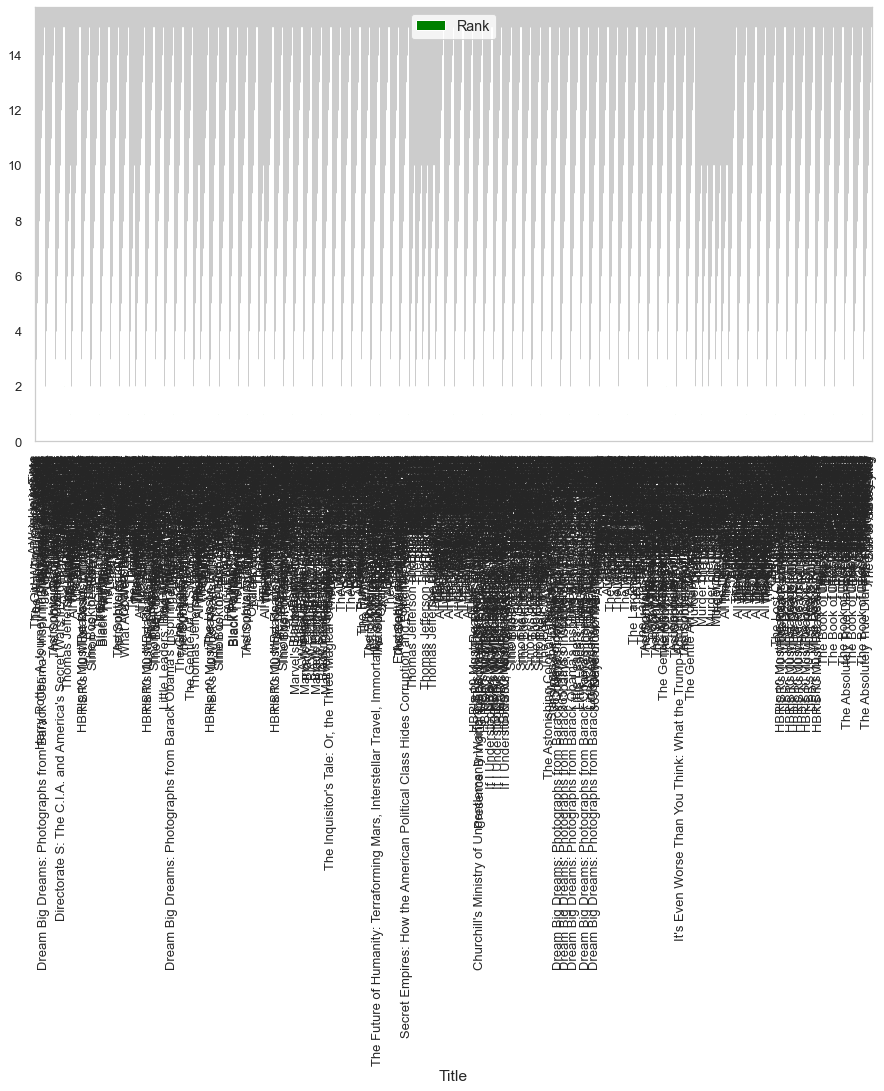

In [116]:
df_bestSeller.plot(x='Title',y='Rank', kind='bar', figsize=(15,8), fontsize=13, color='green')

In [115]:
#df_bestSeller.plot(kind='bar', figsize=(15,8), fontsize=13, color='orange')
#plt.ylabel('Rank')

Text(0.5, 0, 'Best Selling Author')

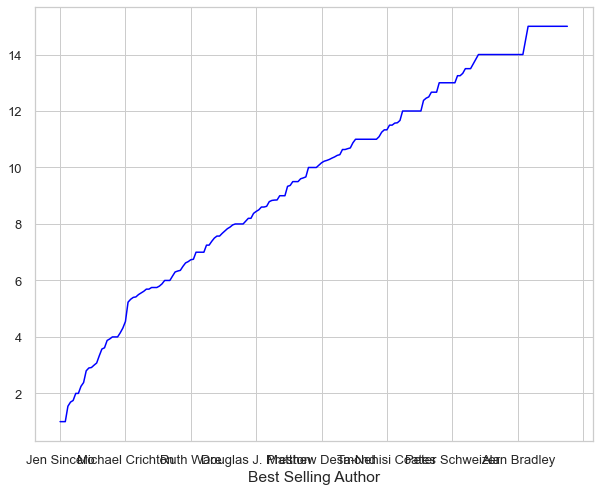

In [154]:
df_bestSeller.groupby(['Author'])['Rank'].mean().sort_values().plot(kind='line', figsize=(10,8),fontsize=13, color='blue')
plt.xlabel('Best Selling Author')

### Observations: Alan Bradley has the maximum best selling books
apart from Alan Bradley, above authors have the best selling books

Text(0.5, 0, 'Best Seller')

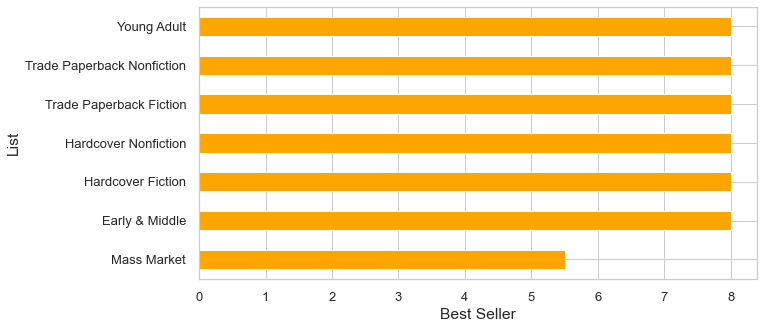

In [108]:
df_bestSeller.groupby(['List'])['Rank'].mean().sort_values().plot(kind='barh', figsize=(10,5),fontsize=13, color='orange')
plt.xlabel('Best Seller')

### Observation: All the genres except Mass Market have had 8 best sellers.
Hence, surely the category **Mass Market** does not produce many best sellers.

In [81]:
#df_merge['Title'].value_counts()
#df_merge['Title'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                              # figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
    
df_merge['bestBook'] = df_merge.apply(lambda x: 'True' if x['Rank'] ==1 else 'False' ,axis=1)
    
#for i in df_merge['Title']:
#    if(df_merge.loc[df_merge['Rank']]==1):
#        bestBook=[i]
        

print(df_merge['bestBook'])

0       False
1       False
2       False
3       False
4       False
        ...  
5001    False
5002    False
5003    False
5004    False
5005    False
Name: bestBook, Length: 5006, dtype: object


In [130]:
#df_EDA['Book Title'].unique()
df_bestSeller['Title'].unique()
#df_bestSeller['Title'].value_counts()

#.plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
#                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

#plt.ylabel('Book Title')
#plt.title('Pie chart showing the proportion of books being adapted into Movies')

array(['A Wrinkle in Time', 'Wonder', 'Auggie & Me',
       'The Girl Who Drank the Moon', 'Smile',
       'The War That Saved My Life', 'Drama', 'The War I Finally Won',
       'Wishtree', 'Sisters', 'Ghosts',
       'Harry Potter: A Journey Through a History of Magic',
       'The One and Only Ivan',
       "Dream Big Dreams: Photographs from Barack Obama's Inspiring and Historic Presidency",
       'Refugee', 'The Great Alone', 'An American Marriage',
       'The Woman in the Window', 'A Gentleman in Moscow',
       'The Immortalists', 'Little Fires Everywhere',
       'Sing, Unburied, Sing', 'Still Me', 'Origin',
       'The Wife Between Us', 'The Power', 'The Rooster Bar', 'Artemis',
       'Manhattan Beach', 'Munich', 'Fire and Fury',
       'Astrophysics for People in a Hurry',
       'The Subtle Art of Not Giving A F*ck', 'Leonardo da Vinci',
       'The Last Black Unicorn', 'The Monk of Mokha',
       'Killers of the Flower Moon', 'Obama: An Intimate Portrait',
       'Princip

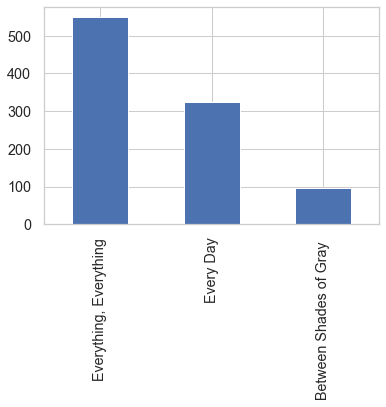

In [149]:
df_EDA['Book Title'].value_counts().plot(kind='bar')


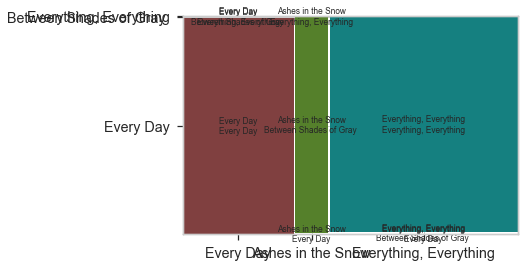

In [151]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 10.0
mosaic(df_EDA, ['Movie Title', 'Book Title']);

<a id=section6></a>
## 6. Conclusion

<a id=section601></a>
### 6.1 Actionable insights

- The Genre **Young Adult** has maximum best sellers. A book based on this genre has higher probability of high sales and loved by readers.
- The Genre **Mass Market** has very low chances of resulting in a best seller.
- The author **Alan Bradley** is loved by readers and has had the highest best selling books so far. A book by **Alan Bradley** should certainly achieve higher sales.
